# Course: Social Media Mining
# Paper - 3

## Name: Greeshma Sai Sree Duggireddy

### Sentiment Analysis through TextBlob

In [1]:
import pandas as pd
from textblob import TextBlob

In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import sent_tokenize, RegexpTokenizer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Greeshma Sai
[nltk_data]     Sree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Greeshma Sai
[nltk_data]     Sree\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### #Abortion Dataset

In [3]:
dataset1 = pd.read_csv("df_abortion.csv")

In [4]:
dataset1

,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card
0,https://twitter.com/arbriterfire/status/152057...,2022-05-01 01:07:09+00:00,"""Follow the science!"" In this video Dr. Tim ex...","""Follow the science!"" In this video Dr. Tim ex...",1520570486689779712,"{'username': 'arbriterfire', 'id': 14189121822...",0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['followthescience', 'abortion', 'populationco...",NaN,{'title': 'Following The Science VS The Sancti...
1,https://twitter.com/poorservant/status/1520564...,2022-05-01 00:43:23+00:00,"🙏🏾 On this Saturday, pray for an end to #abort...","🙏🏾 On this Saturday, pray for an end to #abort...",1520564507365543936,"{'username': 'poorservant', 'id': 56798817, 'd...",0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['abortion', 'UnitedHearts', 'HolyLove', 'BVM']",NaN,NaN
2,https://twitter.com/GodDBestAvenger/status/152...,2022-05-01 00:42:28+00:00,The #abortion industry and #prochoice folk wan...,The #abortion industry and #prochoice folk wan...,1520564274178969602,"{'username': 'GodDBestAvenger', 'id': 13813458...",0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['abortion', 'prochoice', 'regret', 'females']",NaN,NaN
3,https://twitter.com/wuttnotw/status/1520559328...,2022-05-01 00:22:49+00:00,Murderous abortion mothers are not the only on...,Murderous abortion mothers are not the only on...,1520559328658399233,"{'username': 'wuttnotw', 'id': 1556984245, 'di...",0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['abortion'],NaN,"{'title': 'Deny Your Programming', 'url': 'htt..."
4,https://twitter.com/sempervirens117/status/152...,2022-05-01 00:18:07+00:00,@EricMeyersonSF @BerkeleyHaas Abortion in Amer...,@EricMeyersonSF @BerkeleyHaas Abortion in Amer...,1520558147768700929,"{'username': 'sempervirens117', 'id': 12306477...",0,0,0,0,...,NaN,NaN,1.520436e+18,"{'username': 'EricMeyersonSF', 'id': 908071014...","[{'username': 'EricMeyersonSF', 'id': 90807101...",NaN,NaN,"['abortion', 'citizenship', 'inalienablerights...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://twitter.com/AbortionReviews/status/151...,2022-04-26 14:50:24+00:00,Regreting the facts “Crying on the inside for ...,Regreting the facts “Crying on the inside for ...,1518965724928110592,"{'username': 'AbortionReviews', 'id': 96056758...",0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['abortiontestimonials', 'abortion', 'womentel...",NaN,"{'title': 'Regreting the facts ""Crying on the ..."
996,https://twitter.com/HalleluYah1237/status/1518...,2022-04-26 14:49:42+00:00,@JillStanek For you did form my inward parts:\...,@JillStanek For you did form my inward parts:\...,1518965549363081216,"{'username': 'HalleluYah1237', 'id': 479964401...",0,0,1,0,...,NaN,NaN,1.498076e+18,"{'username': 'JillStanek', 'id': 20852423, 'di...","[{'username': 'JillStanek', 'id': 20852423, 'd...",NaN,NaN,"['Life', 'ProLife', 'abortion']",NaN,NaN
997,https://twitter.com/RealYeshua1/status/1518965...,2022-04-26 14:48:28+00:00,@Pulse2AM @deepbluezz58 @DaveMerrell69 A soul ...,@Pulse2AM @deepbluezz58 @DaveMerrell69 A soul ...,1518965239215235073,"{'username': 'RealYeshua1', 'id': 2558048480, ...",0,1,1,0,...,NaN,NaN,1.518956e+18,"{'username': 'Pulse2AM', 'id': 310967043, 'dis...","[{'username': 'Pulse2AM', 'id': 310967043, 'di...",NaN,NaN,['abortion'],NaN,NaN
998,https://twitter.com/sgszewczyk/status/15189648...,2022-04-26 14:47:00+00:00,Yet Unborn - Already Alive\n#abortion #abortio...,Yet Unborn - Already Alive\n#abortion #abortio...,1518964868250013696,"{'username': 'sgszewczyk', 'id': 1063436906514...",0,0,2,0,...,NaN,{'url': 'https://twitter.com/sgszewczyk/status...,NaN,NaN,NaN,NaN,NaN,"['abortion', 'abortionisevil', 'aborcja']",NaN,NaN


In [5]:
dataset1['content'] = dataset1['content'].apply(lambda txt: txt.lower())

In [6]:
stop_words=stopwords.words('english')
dataset1['content'] = dataset1['content'].apply(lambda txt: ' '.join([word for word in txt.split() if word not in stop_words]))

In [7]:
dataset1['content'] = dataset1['content'].apply(lambda txt: sent_tokenize(txt))

In [8]:
dataset1['content'] = dataset1['content'].apply(lambda txt: ' '.join(txt))

In [9]:
abortion_sentiments = dataset1[['content']]
def detect_polarity(text):
    return TextBlob(text).sentiment.polarity
abortion_sentiments['polarity'] = abortion_sentiments.content.apply(detect_polarity)
abortion_sentiments

C:\Users\GREESH~1\AppData\Local\Temp/ipykernel_36808/204420091.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abortion_sentiments['polarity'] = abortion_sentiments.content.apply(detect_polarity)


,content,polarity
0,"""follow science!"" video dr. tim explores ""scie...",-0.400000
1,"🙏🏾 saturday, pray end #abortion conversion hea...",0.000000
2,#abortion industry #prochoice folk want people...,-0.070833
3,murderous abortion mothers ones say “my body c...,0.333333
4,@ericmeyersonsf @berkeleyhaas abortion america...,0.141667
...,...,...
995,regreting facts “crying inside help…” https://...,-0.200000
996,@jillstanek form inward parts: cover mother's ...,0.621429
997,@pulse2am @deepbluezz58 @davemerrell69 soul ne...,-0.313889
998,yet unborn - already alive #abortion #abortion...,0.100000


In [10]:
def polarity_score(polarity):
    if polarity > 0:
        return "positive"
    elif polarity == 0:
        return "neutral"
    else:
        return "negative"

In [11]:
abortion_sentiments['sentiment'] = abortion_sentiments['polarity'].apply(lambda val: polarity_score(val))
abortion_sentiments

C:\Users\GREESH~1\AppData\Local\Temp/ipykernel_36808/910487845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abortion_sentiments['sentiment'] = abortion_sentiments['polarity'].apply(lambda val: polarity_score(val))


,content,polarity,sentiment
0,"""follow science!"" video dr. tim explores ""scie...",-0.400000,negative
1,"🙏🏾 saturday, pray end #abortion conversion hea...",0.000000,neutral
2,#abortion industry #prochoice folk want people...,-0.070833,negative
3,murderous abortion mothers ones say “my body c...,0.333333,positive
4,@ericmeyersonsf @berkeleyhaas abortion america...,0.141667,positive
...,...,...,...
995,regreting facts “crying inside help…” https://...,-0.200000,negative
996,@jillstanek form inward parts: cover mother's ...,0.621429,positive
997,@pulse2am @deepbluezz58 @davemerrell69 soul ne...,-0.313889,negative
998,yet unborn - already alive #abortion #abortion...,0.100000,positive


In [12]:
abortion_sentiments['sentiment'].value_counts()

positive    399
neutral     392
negative    209
Name: sentiment, dtype: int64

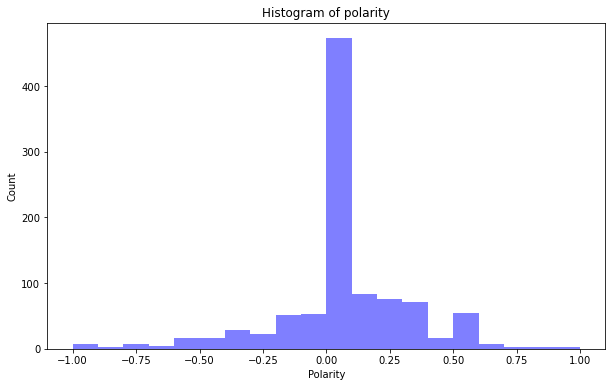

In [13]:
import matplotlib.pyplot as plt
num_bins = 20
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(abortion_sentiments.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show();

### Abortion Data From USA

In [14]:
dataset2 = pd.read_csv("df_AbortionUNITEDSTATES.csv")

In [15]:
dataset2

,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,user_location
0,https://twitter.com/arbriterfire/status/152057...,2022-05-01 01:07:09+00:00,"""Follow the science!"" In this video Dr. Tim ex...","""Follow the science!"" In this video Dr. Tim ex...",1520570486689779712,"{'username': 'arbriterfire', 'id': 14189121822...",0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,"['followthescience', 'abortion', 'populationco...",NaN,{'title': 'Following The Science VS The Sancti...,"Florida, USA"
1,https://twitter.com/poorservant/status/1520564...,2022-05-01 00:43:23+00:00,"🙏🏾 On this Saturday, pray for an end to #abort...","🙏🏾 On this Saturday, pray for an end to #abort...",1520564507365543936,"{'username': 'poorservant', 'id': 56798817, 'd...",0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,"['abortion', 'UnitedHearts', 'HolyLove', 'BVM']",NaN,NaN,"Cleveland, OH"
2,https://twitter.com/Dame_ThugLife/status/15205...,2022-04-30 23:21:10+00:00,"Whoever needs to hear this:\nAbortion isn't ""h...","Whoever needs to hear this:\nAbortion isn't ""h...",1520543816616448003,"{'username': 'Dame_ThugLife', 'id': 1368475982...",0,3,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,['abortion'],NaN,NaN,"Washington, DC"
3,https://twitter.com/BenBen_Show/status/1520538...,2022-04-30 23:01:18+00:00,People who are pro-abortion are more likely to...,People who are pro-abortion are more likely to...,1520538813877133317,"{'username': 'BenBen_Show', 'id': 3018555016, ...",0,0,0,0,...,NaN,NaN,NaN,"[{'username': 'benshapiro', 'id': 17995040, 'd...",NaN,NaN,"['abortion', 'dwa']",NaN,{'title': 'Amanda Bynes apologized after accus...,"New York, NY"
4,https://twitter.com/ar_ROCKETMAN/status/152053...,2022-04-30 22:40:00+00:00,#Abortion #AbortionKills #AbortionKillsHumans ...,#Abortion #AbortionKills #AbortionKillsHumans ...,1520533454189907968,"{'username': 'ar_ROCKETMAN', 'id': 74040669, '...",1,0,0,0,...,NaN,NaN,NaN,"[{'username': 'marygribbin809', 'id': 20464146...",NaN,NaN,"['Abortion', 'AbortionKills', 'AbortionKillsHu...",NaN,NaN,Texas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://twitter.com/bentleybrian/status/135460...,2021-01-28 01:57:39+00:00,2500 babies are slaughtered on the alter of co...,2500 babies are slaughtered on the alter of co...,1354609553409761281,"{'username': 'bentleybrian', 'id': 60227645, '...",0,0,0,0,...,NaN,NaN,NaN,"[{'username': 'unsplash', 'id': 1520228526, 'd...","{'longitude': -82.045319, 'latitude': 34.875556}","{'fullName': 'Spartanburg, SC', 'name': 'Spart...","['socialjustice', 'abortion', 'life', 'forgive...",NaN,NaN,Upstate South Carolina
996,https://twitter.com/DebD417/status/13540875025...,2021-01-26 15:23:13+00:00,@JoeBiden @KamalaHarris As you pray to the On...,@JoeBiden @KamalaHarris As you pray to the On...,1354087502597009409,"{'username': 'DebD417', 'id': 23862566, 'displ...",0,1,0,0,...,NaN,NaN,NaN,"[{'username': 'JoeBiden', 'id': 939091, 'displ...","{'longitude': -86.40544, 'latitude': 36.138726}","{'fullName': 'Lebanon, TN', 'name': 'Lebanon',...",['Abortion'],NaN,NaN,Tennessee
997,https://twitter.com/CatholicMascul1/status/135...,2021-01-26 01:36:19+00:00,"Mr. President, @POTUS @JoeBiden, I'm not makin...","Mr. President, @POTUS @JoeBiden, I'm not makin...",1353879410001252353,"{'username': 'CatholicMascul1', 'id': 12740934...",1,0,1,0,...,NaN,NaN,NaN,"[{'username': 'POTUS', 'id': 13491490969096683...","{'longitude': -85.404424, 'latitude': 34.983674}","{'fullName': 'Chattanooga, TN', 'name': 'Chatt...","['Catholic', 'Abortion', 'CatholicTwitter']",NaN,NaN,Southeast Tennessee
998,https://twitter.com/StephLSchmid/status/135373...,2021-01-25 15:45:21+00:00,"Long time complicity &amp; complacency, &amp; ...","Long time complicity &amp; complacency, &amp; ...",1353730688600702976,"{'username': 'StephLSchmid', 'id': 11279493848...",1,0,0,0,...,NaN,1.353729e+18,"{'user

In [16]:
dataset2['content'] = dataset2['content'].apply(lambda txt: txt.lower())

In [17]:
stop_words=stopwords.words('english')
dataset2['content'] = dataset2['content'].apply(lambda txt: ' '.join([word for word in txt.split() if word not in stop_words]))

In [18]:
dataset2['content'] = dataset2['content'].apply(lambda txt: sent_tokenize(txt))

In [19]:
dataset2['content'] = dataset2['content'].apply(lambda txt: ' '.join(txt))

In [20]:
abortionUSA_sentiments = dataset2[['content']]
def detect_polarity(text):
    return TextBlob(text).sentiment.polarity
abortionUSA_sentiments['polarity'] = abortionUSA_sentiments.content.apply(detect_polarity)
abortionUSA_sentiments

C:\Users\GREESH~1\AppData\Local\Temp/ipykernel_36808/244840946.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abortionUSA_sentiments['polarity'] = abortionUSA_sentiments.content.apply(detect_polarity)


,content,polarity
0,"""follow science!"" video dr. tim explores ""scie...",-0.400
1,"🙏🏾 saturday, pray end #abortion conversion hea...",0.000
2,"whoever needs hear this: abortion ""healthcare""...",0.200
3,people pro-abortion likely return pandemic pup...,0.000
4,#abortion #abortionkills #abortionkillshumans ...,-1.000
...,...,...
995,2500 babies slaughtered alter convenience day ...,0.000
996,"@joebiden @kamalaharris pray one true god, tur...",-0.325
997,"mr. president, @potus @joebiden, i'm making po...",0.000
998,"long time complicity &amp; complacency, &amp; ...",-0.050


In [21]:
def polarity_score(polarity):
    if polarity < 0:
        return "negative"
    elif polarity == 0:
        return "neutral"
    else:
        return "positive"

In [22]:
abortionUSA_sentiments['sentiment'] = abortionUSA_sentiments['polarity'].apply(lambda val: polarity_score(val))
abortionUSA_sentiments

C:\Users\GREESH~1\AppData\Local\Temp/ipykernel_36808/1574921971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abortionUSA_sentiments['sentiment'] = abortionUSA_sentiments['polarity'].apply(lambda val: polarity_score(val))


,content,polarity,sentiment
0,"""follow science!"" video dr. tim explores ""scie...",-0.400,negative
1,"🙏🏾 saturday, pray end #abortion conversion hea...",0.000,neutral
2,"whoever needs hear this: abortion ""healthcare""...",0.200,positive
3,people pro-abortion likely return pandemic pup...,0.000,neutral
4,#abortion #abortionkills #abortionkillshumans ...,-1.000,negative
...,...,...,...
995,2500 babies slaughtered alter convenience day ...,0.000,neutral
996,"@joebiden @kamalaharris pray one true god, tur...",-0.325,negative
997,"mr. president, @potus @joebiden, i'm making po...",0.000,neutral
998,"long time complicity &amp; complacency, &amp; ...",-0.050,negative


In [23]:
abortionUSA_sentiments['sentiment'].value_counts()

negative    381
positive    358
neutral     261
Name: sentiment, dtype: int64

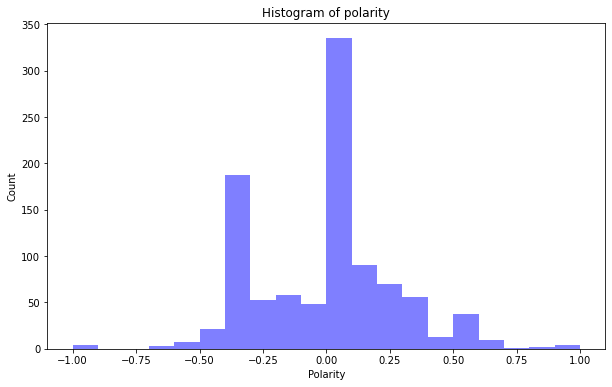

In [24]:
import matplotlib.pyplot as plt
num_bins = 20
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(abortionUSA_sentiments.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show();

### Abortion Data From Ireland

In [25]:
dataset3 = pd.read_csv("df_AbortionIRELAND.csv")

In [26]:
dataset3

,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,user_location
0,https://twitter.com/sodomhnaill34/status/15204...,2022-04-30 14:28:27+00:00,As the #abortion review process is operational...,As the #abortion review process is operational...,1520409753884762114,"{'username': 'sodomhnaill34', 'id': 9590215082...",1,8,24,0,...,NaN,NaN,NaN,NaN,NaN,NaN,['abortion'],NaN,NaN,"Galway, Ireland"
1,https://twitter.com/Aine_o_Eire/status/1520340...,2022-04-30 09:53:23+00:00,@JRD0000 @OrlaNWCI as the rest of the world wa...,@JRD0000 @OrlaNWCI as the rest of the world wa...,1520340530193965056,"{'username': 'Aine_o_Eire', 'id': 397967759, '...",0,0,0,0,...,NaN,1.520004e+18,"{'username': 'JRD0000', 'id': 3248697537, 'dis...","[{'username': 'JRD0000', 'id': 3248697537, 'di...",NaN,NaN,"['abortion', 'Ireland']",NaN,NaN,Éire
2,https://twitter.com/r0fficial/status/152031069...,2022-04-30 07:54:50+00:00,@MarionDyer18 #Sterilisation 💀 &amp; #abortion...,@MarionDyer18 #Sterilisation 💀 &amp; #abortion...,1520310694796795909,"{'username': 'r0fficial', 'id': 12495164357615...",1,1,5,0,...,NaN,1.520095e+18,"{'username': 'MarionDyer18', 'id': 98614194160...","[{'username': 'MarionDyer18', 'id': 9861419416...",NaN,NaN,"['Sterilisation', 'abortion']",NaN,NaN,"Dublin City, Ireland"
3,https://twitter.com/StephaniePMcKea/status/152...,2022-04-29 20:24:33+00:00,Cat is determined to steal another woman’s hus...,Cat is determined to steal another woman’s hus...,1520136982025969664,"{'username': 'StephaniePMcKea', 'id': 73737641...",0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,"['abortion', 'Christian', 'ProLife', 'YA', 'Ad...",NaN,"{'title': ""Love's Beating Heart"", 'url': 'http...","Dunoon, Scotland"
4,https://twitter.com/Sange1962/status/151999248...,2022-04-29 10:50:24+00:00,@OliveOwl6 @cathworkingmom @pixposies @Constan...,@OliveOwl6 @cathworkingmom @pixposies @Constan...,1519992488777367553,"{'username': 'Sange1962', 'id': 231076439, 'di...",7,1,3,0,...,NaN,1.519989e+18,"{'username': 'OliveOwl6', 'id': 15065781581826...","[{'username': 'OliveOwl6', 'id': 1506578158182...",NaN,NaN,"['abortion', 'stopthekilling']",NaN,NaN,England
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://twitter.com/TheSoulfulDoc/status/77798...,2016-09-19 21:35:02+00:00,Science can be cold &amp; hard - jus like pro-...,Science can be cold &amp; hard - jus like pro-...,777984367167758336,"{'username': 'TheSoulfulDoc', 'id': 201868463,...",0,0,2,0,...,{'url': 'https://twitter.com/maz240708/status/...,NaN,NaN,NaN,"{'longitude': -8.19417899950185, 'latitude': 5...","{'fullName': 'Northern Ireland, United Kingdom...",['abortion'],NaN,NaN,N. Ireland
996,https://twitter.com/arielpayit4ward/status/777...,2016-09-18 11:05:52+00:00,@calmiom I'm lucky in #DouglasEast that most c...,@calmiom I'm lucky in #DouglasEast that most c...,777463645089464320,"{'username': 'arielpayit4ward', 'id': 6676782,...",1,0,3,0,...,NaN,7.774565e+17,"{'username': 'calmiom', 'id': 7733001661955440...","[{'username': 'calmiom', 'id': 773300166195544...","{'longitude': -4.5367617, 'latitude': 54.1403136}","{'fullName': 'Douglas, Isle of Man', 'name': '...","['DouglasEast', 'abortion', 'IOMelection2016',...",NaN,NaN,Isle of Man
997,https://twitter.com/CatholicIreland/status/774...,2016-09-10 15:01:13+00:00,‘Disgraceful that a state funded agency campai...,‘Disgraceful that a state funded agency campai...,774623771235868672,"{'username': 'CatholicIreland', 'id': 22881493...",1,0,0,0,...,NaN,NaN,NaN,"[{'username': 'prolifecampaign', 'id': 9562121...","{'longitude': -6.387438, 'latitude': 53.2987449}","{'fullName': 'Dublin City, Ireland', 'name': '...",['abortion'],NaN,NaN,NaN
998,https://twitter.com/PatrickCorrigan/status/774...,2016-09-08 22:15:39+00:00,Opinion polls? Here's a few. \n7 in 10 want #M...,Opinion polls? Here's a few. \n7 in 1

In [27]:
dataset3['content'] = dataset3['content'].apply(lambda txt: txt.lower())

In [28]:
stop_words=stopwords.words('english')
dataset3['content'] = dataset3['content'].apply(lambda txt: ' '.join([word for word in txt.split() if word not in stop_words]))

In [29]:
dataset3['content'] = dataset3['content'].apply(lambda txt: sent_tokenize(txt))

In [30]:
dataset3['content'] = dataset3['content'].apply(lambda txt: ' '.join(txt))

In [31]:
abortionIreland_sentiments = dataset3[['content']]
def detect_polarity(text):
    return TextBlob(text).sentiment.polarity
abortionIreland_sentiments['polarity'] = abortionIreland_sentiments.content.apply(detect_polarity)
abortionIreland_sentiments

C:\Users\GREESH~1\AppData\Local\Temp/ipykernel_36808/2815090173.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abortionIreland_sentiments['polarity'] = abortionIreland_sentiments.content.apply(detect_polarity)


,content,polarity
0,#abortion review process operational clear pro...,-0.025000
1,@jrd0000 @orlanwci rest world wakes horrors #a...,0.000000
2,@mariondyer18 #sterilisation 💀 &amp; #abortion...,0.075758
3,cat determined steal another woman’s husband. ...,0.000000
4,@oliveowl6 @cathworkingmom @pixposies @constan...,0.277778
...,...,...
995,science cold &amp; hard - jus like pro-life vi...,-0.445833
996,@calmiom i'm lucky #douglaseast candidates fav...,0.333333
997,‘disgraceful state funded agency campaigning #...,0.000000
998,opinion polls? here's few. 7 10 want #marriage...,-0.200000


In [32]:
def polarity_score(polarity):
    if polarity < 0:
        return "negative"
    elif polarity == 0:
        return "neutral"
    else:
        return "positive"

In [33]:
abortionIreland_sentiments['sentiment'] = abortionIreland_sentiments['polarity'].apply(lambda val: polarity_score(val))
abortionIreland_sentiments

C:\Users\GREESH~1\AppData\Local\Temp/ipykernel_36808/3186970310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abortionIreland_sentiments['sentiment'] = abortionIreland_sentiments['polarity'].apply(lambda val: polarity_score(val))


,content,polarity,sentiment
0,#abortion review process operational clear pro...,-0.025000,negative
1,@jrd0000 @orlanwci rest world wakes horrors #a...,0.000000,neutral
2,@mariondyer18 #sterilisation 💀 &amp; #abortion...,0.075758,positive
3,cat determined steal another woman’s husband. ...,0.000000,neutral
4,@oliveowl6 @cathworkingmom @pixposies @constan...,0.277778,positive
...,...,...,...
995,science cold &amp; hard - jus like pro-life vi...,-0.445833,negative
996,@calmiom i'm lucky #douglaseast candidates fav...,0.333333,positive
997,‘disgraceful state funded agency campaigning #...,0.000000,neutral
998,opinion polls? here's few. 7 10 want #marriage...,-0.200000,negative


In [34]:
abortionIreland_sentiments['sentiment'].value_counts()

positive    405
neutral     371
negative    224
Name: sentiment, dtype: int64

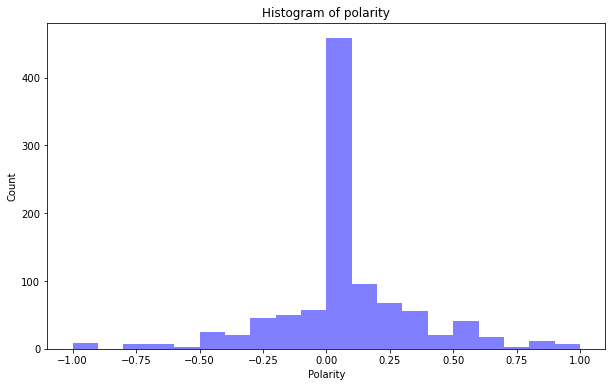

In [35]:
import matplotlib.pyplot as plt
num_bins = 20
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(abortionIreland_sentiments.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show();

### Abortion Data From Philippines

In [13]:
dataset4 = pd.read_csv("df_AbortionPHILIPPINES.csv")

In [14]:
dataset4

,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,user_location
0,https://twitter.com/demonick/status/1520566318...,2022-05-01 00:50:35+00:00,Uber and Lyft extend legal fee coverage to dri...,Uber and Lyft extend legal fee coverage to dri...,1520566318977544192,"{'username': 'demonick', 'id': 12980882, 'disp...",0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Malaysia
1,https://twitter.com/Female_abortion/status/152...,2022-05-01 00:47:38+00:00,@FeierGoddess 初中的时候表弟来我家玩、晚上睡觉的时候我给表弟舔了下面,@FeierGoddess 初中的时候表弟来我家玩、晚上睡觉的时候我给表弟舔了下面,1520565574056955904,"{'username': 'Female_abortion', 'id': 15006701...",0,0,0,0,...,NaN,1.520282e+18,"{'username': 'FeierGoddess', 'id': 14617229724...","[{'username': 'FeierGoddess', 'id': 1461722972...",NaN,NaN,NaN,NaN,NaN,guangdong
2,https://twitter.com/TheHandgunGuy/status/15205...,2022-05-01 00:34:30+00:00,@ElliotWest15 @gabriellaborter @evelynpix @Reu...,@ElliotWest15 @gabriellaborter @evelynpix @Reu...,1520562268555005952,"{'username': 'TheHandgunGuy', 'id': 443096611,...",0,0,0,0,...,NaN,1.519716e+18,"{'username': 'ElliotWest15', 'id': 89503401503...","[{'username': 'ElliotWest15', 'id': 8950340150...",NaN,NaN,NaN,NaN,NaN,CA
3,https://twitter.com/JirenHan/status/1520559468...,2022-05-01 00:23:22+00:00,@FoxNews AOC wanna be famous for attacking Mus...,@FoxNews AOC wanna be famous for attacking Mus...,1520559468886470657,"{'username': 'JirenHan', 'id': 805172951116967...",0,0,0,0,...,NaN,1.520544e+18,"{'username': 'FoxNews', 'id': 1367531, 'displa...","[{'username': 'FoxNews', 'id': 1367531, 'displ...",NaN,NaN,NaN,NaN,NaN,Shandong
4,https://twitter.com/Bonyen_Lee/status/15205593...,2022-05-01 00:22:43+00:00,Last week of the fund-a-thon for abortion fund...,Last week of the fund-a-thon for abortion fund...,1520559305463840769,"{'username': 'Bonyen_Lee', 'id': 167596782, 'd...",0,0,0,0,...,{'url': 'https://twitter.com/PPSLR/status/1520...,NaN,NaN,NaN,NaN,NaN,['AbortionIsHealthcare'],NaN,NaN,Kansas City Metro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://twitter.com/frncsclloyddd/status/12772...,2020-06-28 17:04:38+00:00,"hi guys, duck abortion nga pala yung english n...","hi guys, duck abortion nga pala yung english n...",1277286800671690757,"{'username': 'frncsclloyddd', 'id': 7254720629...",1,0,0,0,...,{'url': 'https://twitter.com/Sytsree/status/12...,NaN,NaN,NaN,"{'longitude': 120.4977942, 'latitude': 15.1120...","{'fullName': 'Angeles City, Central Luzon', 'n...",NaN,NaN,NaN,NaN
996,https://twitter.com/Newmind0071/status/1277138...,2020-06-28 07:15:23+00:00,@GunnelsWarren @mehdirhasan So what is France'...,@GunnelsWarren @mehdirhasan So what is France'...,1277138508365180928,"{'username': 'Newmind0071', 'id': 127303307668...",0,0,0,0,...,NaN,1.276582e+18,"{'username': 'GunnelsWarren', 'id': 2725669979...","[{'username': 'GunnelsWarren', 'id': 272566997...","{'longitude': 106.356398, 'latitude': 10.365786}","{'fullName': 'Ho Chi Minh, Vietnam', 'name': '...",NaN,NaN,NaN,"Ho Chi Minh, Vietnam"
997,https://twitter.com/chaeiseu/status/1276966474...,2020-06-27 19:51:47+00:00,seryoso ang weird ng prinsipyo ng relihiyoso n...,seryoso ang weird ng prinsipyo ng relihiyoso n...,1276966474955907072,"{'username': 'chaeiseu', 'id': 2894502798, 'di...",1,0,2,0,...,NaN,NaN,NaN,NaN,"{'longitude': 121.0518106, 'latitude': 14.542797}","{'fullName': 'Pasig City, National Capital Reg...",NaN,NaN,NaN,Unibersidad ng Pilipinas
998,https://twitter.com/eyoungwah/status/127675306...,2020-06-27 05:43:45+00:00,"My body is my choice, unless it is an abortion...","My body is my choice, unless it is an abortion...",1276753060509831170,"{'username': 'eyoungwah', 'id': 10297446253118...",0,0,0,0,...,{'url': 'https://twitter.com/nowthisnews/statu...,NaN,NaN,NaN,"{'longitude': 100.520724, 'latitude': 13.7535357}","{'fullName': 'Ratchathewi,

In [15]:
dataset4['content'] = dataset4['content'].apply(lambda txt: txt.lower())

In [16]:
stop_words=stopwords.words('english')
dataset4['content'] = dataset4['content'].apply(lambda txt: ' '.join([word for word in txt.split() if word not in stop_words]))

In [17]:
dataset4['content'] = dataset4['content'].apply(lambda txt: sent_tokenize(txt))

In [18]:
dataset4['content'] = dataset4['content'].apply(lambda txt: ' '.join(txt))

In [19]:
abortionPhilippines_sentiments = dataset4[['content']]
def detect_polarity(text):
    return TextBlob(text).sentiment.polarity
abortionPhilippines_sentiments['polarity'] = abortionPhilippines_sentiments.content.apply(detect_polarity)
abortionPhilippines_sentiments

C:\Users\GREESH~1\AppData\Local\Temp/ipykernel_23052/3184316861.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abortionPhilippines_sentiments['polarity'] = abortionPhilippines_sentiments.content.apply(detect_polarity)


,content,polarity
0,uber lyft extend legal fee coverage drivers su...,0.200000
1,@feiergoddess 初中的时候表弟来我家玩、晚上睡觉的时候我给表弟舔了下面,0.000000
2,@elliotwest15 @gabriellaborter @evelynpix @reu...,-0.100000
3,@foxnews aoc wanna famous attacking musk texas...,0.500000
4,last week fund-a-thon abortion funds. go on…gi...,0.000000
...,...,...
995,"hi guys, duck abortion nga pala yung english n...",0.000000
996,@gunnelswarren @mehdirhasan france's stance ab...,0.000000
997,seryoso ang weird ng prinsipyo ng relihiyoso n...,-0.140625
998,"body choice, unless abortion 🙄 https://t.co/6t...",0.000000


In [20]:
def polarity_score(polarity):
    if polarity < 0:
        return "negative"
    elif polarity == 0:
        return "neutral"
    else:
        return "positive"

In [21]:
abortionPhilippines_sentiments['sentiment'] = abortionPhilippines_sentiments['polarity'].apply(lambda val: polarity_score(val))
abortionPhilippines_sentiments

C:\Users\GREESH~1\AppData\Local\Temp/ipykernel_23052/1192701992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abortionPhilippines_sentiments['sentiment'] = abortionPhilippines_sentiments['polarity'].apply(lambda val: polarity_score(val))


,content,polarity,sentiment
0,uber lyft extend legal fee coverage drivers su...,0.200000,positive
1,@feiergoddess 初中的时候表弟来我家玩、晚上睡觉的时候我给表弟舔了下面,0.000000,neutral
2,@elliotwest15 @gabriellaborter @evelynpix @reu...,-0.100000,negative
3,@foxnews aoc wanna famous attacking musk texas...,0.500000,positive
4,last week fund-a-thon abortion funds. go on…gi...,0.000000,neutral
...,...,...,...
995,"hi guys, duck abortion nga pala yung english n...",0.000000,neutral
996,@gunnelswarren @mehdirhasan france's stance ab...,0.000000,neutral
997,seryoso ang weird ng prinsipyo ng relihiyoso n...,-0.140625,negative
998,"body choice, unless abortion 🙄 https://t.co/6t...",0.000000,neutral


In [22]:
abortionPhilippines_sentiments['sentiment'].value_counts()

positive    396
neutral     396
negative    208
Name: sentiment, dtype: int64

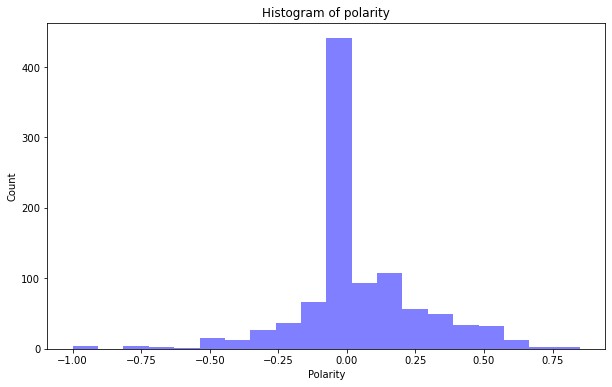

In [46]:
import matplotlib.pyplot as plt
num_bins = 20
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(abortionPhilippines_sentiments.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show();

## Topic Modeling

### Final Data For Topic Modeling

In [47]:
TopicModelling_Data = pd.concat([abortion_sentiments, abortionUSA_sentiments, abortionIreland_sentiments, abortionPhilippines_sentiments], ignore_index=True, sort=False)
TopicModelling_Data

,content,polarity,sentiment
0,"""follow science!"" video dr. tim explores ""scie...",-0.400000,negative
1,"🙏🏾 saturday, pray end #abortion conversion hea...",0.000000,neutral
2,#abortion industry #prochoice folk want people...,-0.070833,negative
3,murderous abortion mothers ones say “my body c...,0.333333,positive
4,@ericmeyersonsf @berkeleyhaas abortion america...,0.141667,positive
...,...,...,...
3995,"hi guys, duck abortion nga pala yung english n...",0.000000,neutral
3996,@gunnelswarren @mehdirhasan france's stance ab...,0.000000,neutral
3997,seryoso ang weird ng prinsipyo ng relihiyoso n...,-0.140625,negative
3998,"body choice, unless abortion 🙄 https://t.co/6t...",0.000000,neutral


In [48]:
# Load the regular expression library
import re
# Remove punctuation
TopicModelling_Data['content'] = \
TopicModelling_Data['content'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
TopicModelling_Data['content'] = \
TopicModelling_Data['content'].map(lambda x: x.lower())
# Print out the first rows of papers
TopicModelling_Data['content'].head()

0    "follow science" video dr tim explores "scienc...
1    🙏🏾 saturday pray end #abortion conversion hear...
2    #abortion industry #prochoice folk want people...
3    murderous abortion mothers ones say “my body c...
4    @ericmeyersonsf @berkeleyhaas abortion america...
Name: content, dtype: object

In [49]:
!pip install pyLDAvis

In [50]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = TopicModelling_Data.content.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to C:\Users\Greeshma Sai
[nltk_data]     Sree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['follow', 'science', 'video', 'dr', 'tim', 'explores', 'science', 'falsely', 'called', 'influenced', 'abortion', 'policy', 'church', 'give', 'channel', 'listen', 'abortion', 'https', 'tco', 'gkzl', 'tzh']


In [51]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1)]


In [52]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.054*"abortion" + 0.022*"tco" + 0.022*"https" + 0.010*"women" + '
  '0.008*"amp" + 0.007*"one" + 0.005*"lost" + 0.005*"makes" + 0.004*"soul" + '
  '0.004*"get"'),
 (1,
  '0.050*"abortion" + 0.041*"https" + 0.041*"tco" + 0.011*"women" + '
  '0.006*"amp" + 0.006*"life" + 0.005*"people" + 0.004*"rights" + 0.003*"get" '
  '+ 0.003*"support"'),
 (2,
  '0.040*"abortion" + 0.017*"https" + 0.016*"tco" + 0.011*"women" + '
  '0.007*"amp" + 0.005*"lost" + 0.005*"soul" + 0.005*"one" + 0.004*"us" + '
  '0.004*"rights"'),
 (3,
  '0.047*"abortion" + 0.018*"https" + 0.018*"tco" + 0.009*"amp" + '
  '0.006*"women" + 0.005*"abortions" + 0.005*"prolife" + 0.005*"life" + '
  '0.004*"people" + 0.004*"th"'),
 (4,
  '0.040*"abortion" + 0.029*"tco" + 0.029*"https" + 0.008*"women" + '
  '0.005*"people" + 0.004*"amp" + 0.003*"abortions" + 0.003*"sa" + '
  '0.003*"even" + 0.003*"us"'),
 (5,
  '0.052*"abortion" + 0.039*"https" + 0.037*"tco" + 0.011*"women" + '
  '0.007*"amp" + 0.005*"rights" + 0.005*"part

In [53]:
import os
import pyLDAvis
import pyLDAvis.gensim_models
import pickle 
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('C:/Users/Greeshma Sai Sree/Documents/SMM Paper 3 Code/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'C:/Users/Greeshma Sai Sree/Documents/SMM Paper 3 Code/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

C:\Users\Greeshma Sai Sree\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.106974 -0.005836       1        1  17.889551
1     -0.018152  0.023435       2        1  13.492852
3     -0.034389  0.081330       3        1  11.855635
7      0.085602  0.010861       4        1  10.961078
5     -0.076965 -0.055473       5        1   9.914415
8     -0.078570  0.020626       6        1   9.252658
0      0.005052  0.036676       7        1   9.245224
9      0.002544 -0.008641       8        1   6.383140
2      0.035842 -0.043470       9        1   5.504561
4     -0.027939 -0.059511      10        1   5.500887, topic_info=           Term         Freq        Total Category  logprob  loglift
0      abortion  3716.000000  3716.000000  Default  30.0000  30.0000
230        lost   387.000000   387.000000  Default  29.0000  29.0000
1482       soul   377.000000   377.000000  Default  28.0000  28.0000
10        https  2186.000000  2186.000000  Default  27.0000  27.0000
15          tco  2188.000000  2188.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
319   pregnancy     6.779393   115.375178  Topic10  -6.4526   0.0660
121         one     8.307168   388.166065  Topic10  -6.2494  -0.9441
159         men     6.522565    95.550358  Topic10  -6.4912   0.2159
96          pro     6.917286   179.078042  Topic10  -6.4325  -0.3535
1482       soul     7.162390   377.027428  Topic10  -6.3977  -1.0632

[794 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
0          1  0.168994  abortion
0          2  0.142891  abortion
0          3  0.115981  abortion
0          4  0.113021  abortion
0          5  0.108985  abortion
...      ...       ...       ...
5028       3  0.755162   ztbsgvx
10630      9  0.435319    аборти
10639      9  0.439628     много
10642      9  0.439299       наи
10656      9  0.438385    според

[2093 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 2, 4, 8, 6, 9, 1, 10, 3, 5])

## Hashtags Analysis

In [54]:
Data_Hashtags = pd.concat([dataset1, dataset2, dataset3, dataset4], ignore_index=True, sort=False)
Data_Hashtags

,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,user_location
0,https://twitter.com/arbriterfire/status/152057...,2022-05-01 01:07:09+00:00,"""follow science!"" video dr. tim explores ""scie...","""Follow the science!"" In this video Dr. Tim ex...",1520570486689779712,"{'username': 'arbriterfire', 'id': 14189121822...",0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,"['followthescience', 'abortion', 'populationco...",NaN,{'title': 'Following The Science VS The Sancti...,NaN
1,https://twitter.com/poorservant/status/1520564...,2022-05-01 00:43:23+00:00,"🙏🏾 saturday, pray end #abortion conversion hea...","🙏🏾 On this Saturday, pray for an end to #abort...",1520564507365543936,"{'username': 'poorservant', 'id': 56798817, 'd...",0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,"['abortion', 'UnitedHearts', 'HolyLove', 'BVM']",NaN,NaN,NaN
2,https://twitter.com/GodDBestAvenger/status/152...,2022-05-01 00:42:28+00:00,#abortion industry #prochoice folk want people...,The #abortion industry and #prochoice folk wan...,1520564274178969602,"{'username': 'GodDBestAvenger', 'id': 13813458...",0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,"['abortion', 'prochoice', 'regret', 'females']",NaN,NaN,NaN
3,https://twitter.com/wuttnotw/status/1520559328...,2022-05-01 00:22:49+00:00,murderous abortion mothers ones say “my body c...,Murderous abortion mothers are not the only on...,1520559328658399233,"{'username': 'wuttnotw', 'id': 1556984245, 'di...",0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,['abortion'],NaN,"{'title': 'Deny Your Programming', 'url': 'htt...",NaN
4,https://twitter.com/sempervirens117/status/152...,2022-05-01 00:18:07+00:00,@ericmeyersonsf @berkeleyhaas abortion america...,@EricMeyersonSF @BerkeleyHaas Abortion in Amer...,1520558147768700929,"{'username': 'sempervirens117', 'id': 12306477...",0,0,0,0,...,NaN,1.520436e+18,"{'username': 'EricMeyersonSF', 'id': 908071014...","[{'username': 'EricMeyersonSF', 'id': 90807101...",NaN,NaN,"['abortion', 'citizenship', 'inalienablerights...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,https://twitter.com/frncsclloyddd/status/12772...,2020-06-28 17:04:38+00:00,"hi guys, duck abortion nga pala yung english n...","hi guys, duck abortion nga pala yung english n...",1277286800671690757,"{'username': 'frncsclloyddd', 'id': 7254720629...",1,0,0,0,...,{'url': 'https://twitter.com/Sytsree/status/12...,NaN,NaN,NaN,"{'longitude': 120.4977942, 'latitude': 15.1120...","{'fullName': 'Angeles City, Central Luzon', 'n...",NaN,NaN,NaN,NaN
3996,https://twitter.com/Newmind0071/status/1277138...,2020-06-28 07:15:23+00:00,@gunnelswarren @mehdirhasan france's stance ab...,@GunnelsWarren @mehdirhasan So what is France'...,1277138508365180928,"{'username': 'Newmind0071', 'id': 127303307668...",0,0,0,0,...,NaN,1.276582e+18,"{'username': 'GunnelsWarren', 'id': 2725669979...","[{'username': 'GunnelsWarren', 'id': 272566997...","{'longitude': 106.356398, 'latitude': 10.365786}","{'fullName': 'Ho Chi Minh, Vietnam', 'name': '...",NaN,NaN,NaN,"Ho Chi Minh, Vietnam"
3997,https://twitter.com/chaeiseu/status/1276966474...,2020-06-27 19:51:47+00:00,seryoso ang weird ng prinsipyo ng relihiyoso n...,seryoso ang weird ng prinsipyo ng relihiyoso n...,1276966474955907072,"{'username': 'chaeiseu', 'id': 2894502798, 'di...",1,0,2,0,...,NaN,NaN,NaN,NaN,"{'longitude': 121.0518106, 'latitude': 14.542797}","{'fullName': 'Pasig City, National Capital Reg...",NaN,NaN,NaN,Unibersidad ng Pilipinas
3998,https://twitter.com/eyoungwah/status/127675306...,2020-06-27 05:43:45+00:00,"body choice, unless abortion 🙄 https://t.co/6t...","My body is my choice, unless it is an abortion...",1276753060509831170,"{'username': 'eyoungwah', 'id': 10297446253118...",0,0,0,0,...,{'url': 'https://twitter.com/nowthisnews/statu...,NaN,NaN,NaN,"{'longitude': 100.520724, 'latitude': 13.7535357}","{'fullNam

In [55]:
Data = Data_Hashtags[Data_Hashtags.hashtags != '[]']
Data.dropna(subset=['hashtags'], inplace=True)

In [56]:
#Changing each hashtag from str to list
Data.hashtags = Data.hashtags.str.strip('[')
Data.hashtags = Data.hashtags.str.strip(']')
Data.hashtags = Data.hashtags.str.split(',')

In [57]:
from collections import Counter
from itertools import chain
c = Counter(chain.from_iterable(Data['hashtags'].values.tolist()))
res = pd.DataFrame(c.most_common()).set_axis(['Hashtag', 'count'], axis=1, inplace=False)

In [58]:
res.to_csv('hashtags.csv', sep=',', index=False)

In [23]:
df = pd.read_csv('hashtags.csv')

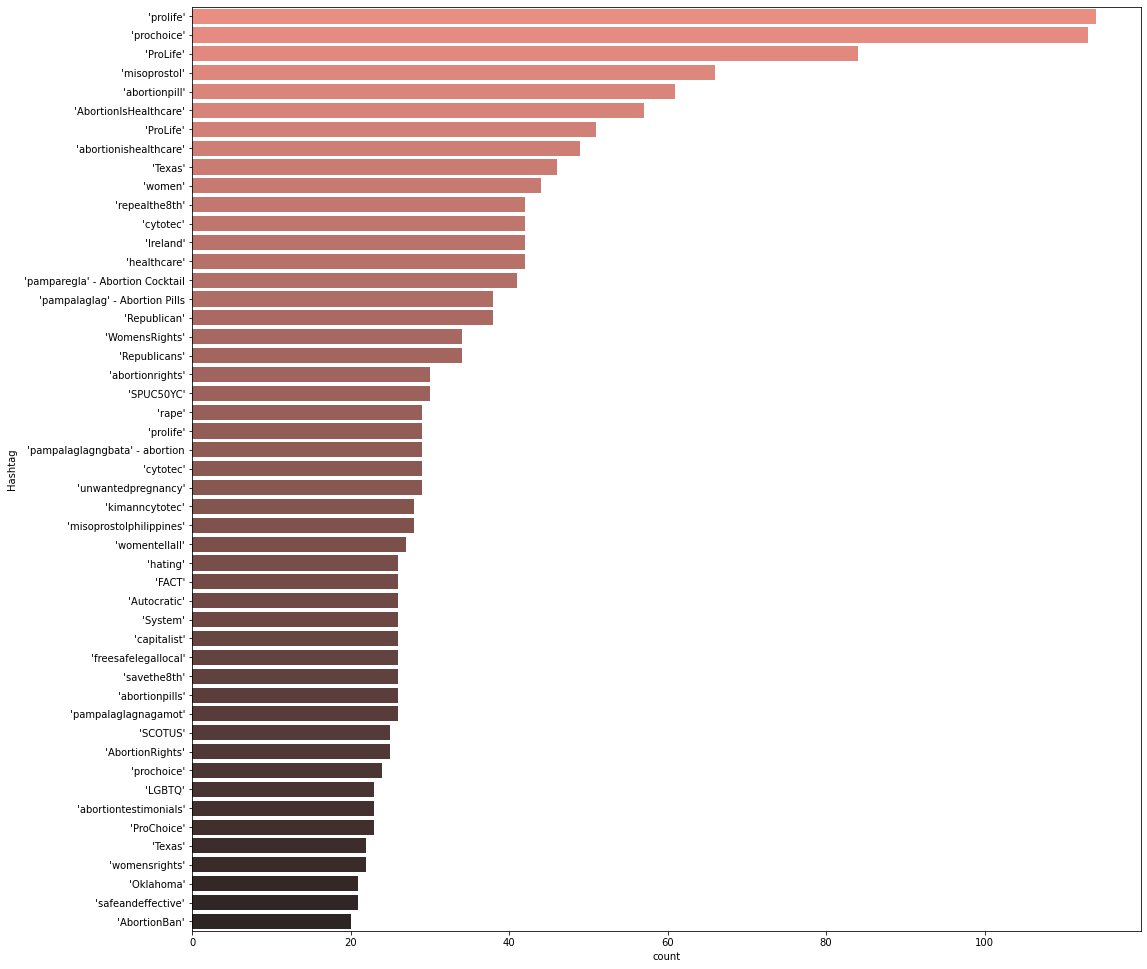

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(17, 17))
sns.barplot(
    x="count",
    y="Hashtag",
    data=df,
    estimator=sum,
    ci=None,
    palette="dark:salmon_r"
);
